<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Unit_1_Sprint_1_Data_Wrangling_and_Visualizations_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Matplotlib Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)

[Pandas EDA Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb)

[Pandas Data Wrangling Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_wrangling_cheatsheet.pdf)

[Matplotlib Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/MatplotLib_Cheat_Sheet.ipynb)

# Setup

Import and alias the following libraries:
- numpy
- pandas
- matplot
- seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="colorblind")

Read in the auto data csv below and verify it's contents

In [0]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [0]:
df = pd.read_csv(auto_url)

In [44]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


You should see there are no column headers. Read in the csv with the column names below and then check the first 5 and last 5 rows of the data frame

In [45]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']

df = pd.read_csv(auto_url, names=columns)

df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
df.tail()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


 Check for nulls and any values that may be a placeholder for nulls

In [32]:
df.isnull()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
df[df.values=="?"]

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315


Replace the placeholders with `NaN` and then recheck for nulls.

In [0]:
df = df.replace("?",np.NaN)

In [64]:
df[df.values=="?"]

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price


In [36]:
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Exploration

Find the following information about the dataframe:
- Get the descriptive statistics for ALL features (numeric and categorical)
- Get the data types for all features
- What are the unique values for the `doors` column
- How many rows and columns are in the dataframe?

In [37]:
df.describe(include="all")

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,5572
freq,NaN,11,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [38]:
df.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

# Cleaning and Feature Engineering

Complete the following actions on the dataframe:
- Fill in the null values in the dataframe without dropping any rows or columns
- Convert the `doors` column to `int`
- Drop the `eng_loc` column
- Create a new column in the df that is the `hp` divided by `price`

Let's inspect the head

In [65]:
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


I'll use a backfill method to replace NaN values as a forwardfill method would not remove the leading NaNs in the "norm_loss" column

In [100]:
df_clean = df.fillna(method = "backfill")

df_clean

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


I'll use the notna function to create a boolean dataframe of not-null-ness, convert to a numpy array, then inspect for unique values. Sweet!

In [101]:
np.unique(pd.notna(df_clean).values)

array([ True])

The NaN values are removed. On to more data cleaning. 

Let's convert the doors column from object to integer data type. 

We can display the frequency of values in the Series

In [102]:
df_clean["doors"].value_counts()

four    116
two      89
Name: doors, dtype: int64

We'll use the map function to convert data values according to a dictionary

In [103]:
df_clean["doors"] = df_clean["doors"].map({"two":2,"four":4})

df_clean["doors"]

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doors, Length: 205, dtype: int64

Nice! Now let's drop the "eng_loc" column

In [0]:
df_clean.drop(["eng_loc"], axis=1, inplace=True)

And a sanity check for column names

In [106]:
df_clean.columns.tolist()

['symboling',
 'norm_loss',
 'make',
 'fuel',
 'aspiration',
 'doors',
 'bod_style',
 'drv_wheels',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine',
 'cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression',
 'hp',
 'peak_rpm',
 'city_mpg',
 'hgwy_mpg',
 'price']

Looks good. "eng_loc" is nowhere to be seen.

Let's do some more data cleaning. 



In [122]:
df_clean["cylinders"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylinders, Length: 205, dtype: object

In [124]:
df_clean["cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylinders, dtype: int64

In [125]:
cylinder_dictionary = {"four":4,"six":6,"five":5,"eight":8,"two":2,"twelve":12, "three":3}

df_clean["cylinders"] = df_clean["cylinders"].map(cylinder_dictionary)

df_clean["cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylinders, dtype: int64

In [126]:
df_clean["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [127]:
df_clean["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.39    10
3.46     9
3.43     8
3.31     8
3.78     8
3.27     7
2.91     7
3.54     6
3.58     6
3.05     6
3.70     5
3.01     5
3.35     4
3.74     3
3.59     3
3.17     3
3.13     2
3.80     2
3.50     2
3.47     2
3.33     2
3.63     2
3.24     2
3.94     2
2.92     1
3.76     1
3.61     1
3.34     1
2.99     1
2.54     1
3.60     1
3.08     1
2.68     1
Name: bore, dtype: int64

In [128]:
df_clean["bore"] = df_clean["bore"].astype("float")

df_clean["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

In [129]:
df_clean["stroke"]

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: object

In [130]:
df_clean["stroke"].value_counts()

3.40    20
3.39    17
3.03    14
3.15    14
3.23    14
2.64    11
3.35     9
3.29     9
3.46     8
3.58     6
3.50     6
3.41     6
3.19     6
3.27     6
3.07     6
3.11     6
3.52     5
3.64     5
3.47     4
3.54     4
3.86     4
3.90     3
2.90     3
2.19     2
4.17     2
2.80     2
3.10     2
2.68     2
3.08     2
3.16     1
2.36     1
2.87     1
3.12     1
2.07     1
3.21     1
2.76     1
Name: stroke, dtype: int64

In [131]:
df_clean["stroke"] = df_clean["stroke"].astype("float")

df_clean["stroke"]

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

In [132]:
df_clean["hp"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: hp, Length: 205, dtype: object

In [133]:
df_clean["hp"].value_counts()

68     19
70     11
69     10
110    10
116     9
95      7
114     6
160     6
88      6
62      6
101     6
145     5
97      5
84      5
102     5
76      5
82      5
111     4
123     4
86      4
92      4
85      3
73      3
121     3
152     3
90      3
207     3
182     3
56      2
112     2
52      2
100     2
156     2
184     2
176     2
155     2
162     2
161     2
94      2
115     1
135     1
58      1
60      1
134     1
262     1
175     1
55      1
154     1
120     1
64      1
143     1
200     1
72      1
140     1
288     1
48      1
106     1
142     1
78      1
Name: hp, dtype: int64

In [134]:
df_clean["hp"] = df_clean["hp"].astype("int")

df_clean["hp"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: hp, Length: 205, dtype: int64

In [135]:
df_clean["peak_rpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak_rpm, Length: 205, dtype: object

In [136]:
df_clean["peak_rpm"].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
5250     9
6000     9
4500     7
5800     7
4150     5
4200     5
4350     4
4750     4
4400     3
5900     3
5100     3
4250     3
6600     2
5750     1
5300     1
5600     1
4900     1
4650     1
Name: peak_rpm, dtype: int64

In [137]:
df_clean["peak_rpm"] = df_clean["peak_rpm"].astype("int")

df_clean["peak_rpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak_rpm, Length: 205, dtype: int64

In [138]:
df_clean["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [139]:
df_clean["price"].value_counts()

11048    3
9279     2
16430    2
7295     2
7775     2
        ..
7975     1
17669    1
19045    1
11199    1
12290    1
Name: price, Length: 186, dtype: int64

In [140]:
df_clean["price"] = df_clean["price"].astype("int")


df_clean["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

Now that the data is mostly cleaned, I'll engineer a new feature

In [142]:
df["hp/price"] = df_clean["hp"] / df_clean["price"]


df["hp/price"]

0      0.008225
1      0.006727
2      0.009333
3      0.007312
4      0.006590
         ...   
200    0.006768
201    0.008401
202    0.006237
203    0.004717
204    0.005039
Name: hp/price, Length: 205, dtype: float64

What does it mean to engineer a feature?

In [0]:
# Feature engineering involves synthesizing raw data into new features more useful for analysis. Columnwise algebra is a common feature engineering technique to produce valuable insights. In today's warm-up, we engineering a hp/price feature. Previously we engineered a price/sq. foot feature too. These combined features provide valueable insights which the raw data lacked. 

What is a `NaN` and why do we care about them?

In [0]:
# NaN is an abbreviation for Not A Number, a commonly seen placeholder for data sets with missing values. Depending on the concentration of NaNs in a data set, different data cleaning techniques may be utilized to systematically reduce the effects of data gaps. If untreated, NaNs can skew analysis results unfavorably.

# Basic Visualizations

Make the following basic graphs with the features in the dataframe:
- Line Plot
- Scatterplot
- Histogram
- Bar Graph
- Density

All graphs should have a title, and label for each axis

In [144]:
df_clean.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


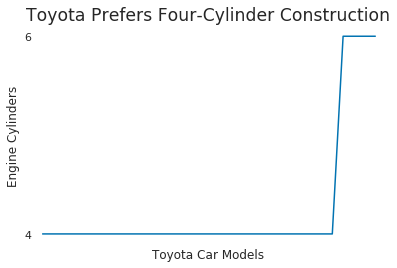

In [187]:
ax = df_clean[df_clean["make"] == "toyota"]["cylinders"].plot()

plt.title("Toyota Prefers Four-Cylinder Construction", fontsize="x-large")

plt.xlabel("Toyota Car Models")
ax.set_xticklabels("")

plt.yticks([4,6])
plt.xticks([0])

plt.ylabel("Engine Cylinders")

ax.set_facecolor("white")
plt.show()

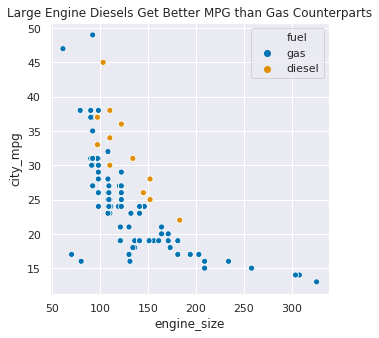

In [199]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.scatterplot(x="engine_size",y="city_mpg", hue="fuel", data=df_clean)

plt.title("Large Engine Diesels Get Better MPG than Gas Counterparts")

plt.show()

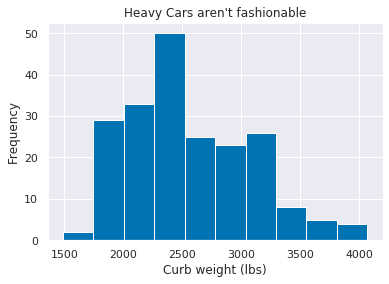

In [204]:
fig, ax = plt.subplots()

ax = df_clean["curb_weight"].plot.hist()

plt.xlabel("Curb weight (lbs)")

plt.title("Heavy Cars aren't fashionable")

plt.show()

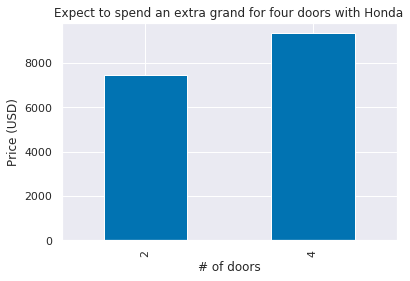

In [215]:
fig, ax = plt.subplots()


df_clean.groupby(["make","doors"]).mean().loc["honda"]["price"].plot(kind="bar", ax=ax)


plt.ylabel("Price (USD)")

plt.xlabel("# of doors")

plt.title("Expect to spend an extra grand for four doors with Honda")

plt.show()

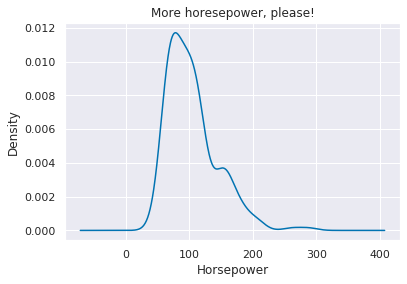

In [218]:
fig, ax = plt.subplots()


df_clean["hp"].plot.density(ax=ax)


plt.xlabel("Horsepower")

plt.title("More horesepower, please!")



plt.show()

Name a graph you would use for the following cases:
- Distribution
- Change Over Time
- Correlation

You may find the answers in the Resources section above or through Google

In [0]:
# Distribution = histogramH")

In [0]:
# Change over time = line

In [0]:
# Correlation = scatter

# Crosstabs and Pivot Tables

Complete the following:
- Make a crosstab of two of the categorical features
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab


In [223]:
df_clean.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [241]:
pd.crosstab(df_clean["make"], df_clean["bod_style"], normalize="index")*100

bod_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,66.666667,0.000000,33.333333,0.000000,0.000000
audi,0.000000,0.000000,14.285714,71.428571,14.285714
bmw,0.000000,0.000000,0.000000,100.000000,0.000000
chevrolet,0.000000,0.000000,66.666667,33.333333,0.000000
dodge,0.000000,0.000000,55.555556,33.333333,11.111111
honda,0.000000,0.000000,53.846154,38.461538,7.692308
isuzu,0.000000,0.000000,25.000000,75.000000,0.000000
jaguar,0.000000,0.000000,0.000000,100.000000,0.000000
mazda,0.000000,0.000000,58.823529,41.176471,0.000000


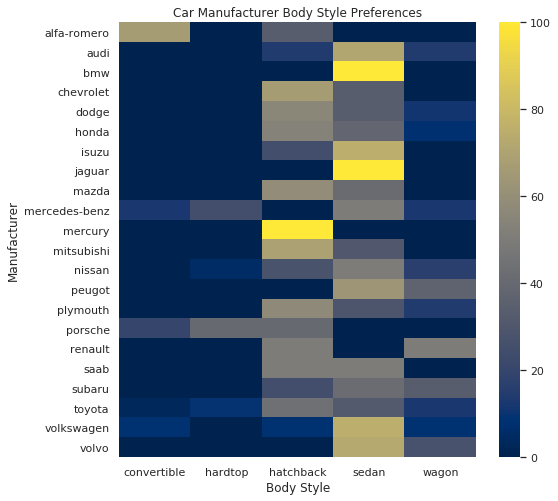

In [244]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.heatmap(pd.crosstab(df_clean["make"], df_clean["bod_style"], normalize="index")*100, cmap="cividis")

plt.title("Car Manufacturer Body Style Preferences")

plt.xlabel("Body Style")

plt.ylabel("Manufacturer")

plt.show()

- Make a crosstab with a categorical feature and `price`
 - Use `pd.cut` to create 5 bins for `price`
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab


In [245]:
pd.crosstab(df_clean["drv_wheels"], pd.cut(df_clean["price"], 5), normalize="index")*100

price,"(5077.718, 13174.4]","(13174.4, 21230.8]","(21230.8, 29287.2]","(29287.2, 37343.6]","(37343.6, 45400.0]"
drv_wheels,,,,,
4wd,77.777778,22.222222,0.000000,0.000000,0.000000
fwd,86.666667,12.500000,0.833333,0.000000,0.000000
rwd,23.684211,47.368421,10.526316,14.473684,3.947368


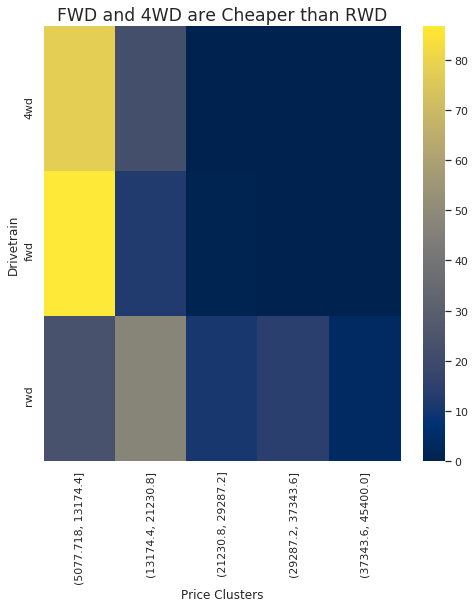

In [250]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.heatmap(pd.crosstab(df_clean["drv_wheels"], pd.cut(df_clean["price"], 5), normalize="index")*100, cmap="cividis")

plt.title("FWD and 4WD are Cheaper than RWD", fontsize="x-large")

plt.ylabel("Drivetrain")

plt.xlabel("Price Clusters")

plt.show()

- Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
 - In a sentence or two, explain how to read the table and what the values mean

In [259]:
df_clean.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [267]:
pd.pivot_table(df_clean, index="make", columns="doors", values=["price", "hp"])

hp                     price              
doors                   2           4             2             4
make                                                             
alfa-romero    125.333333         NaN  15498.333333           NaN
audi           135.000000  115.400000  15840.000000  18381.000000
bmw            134.666667  141.400000  26238.333333  26047.000000
chevrolet       59.000000   70.000000   5723.000000   6575.000000
dodge           95.750000   78.800000   8217.500000   7601.800000
honda           77.250000   85.000000   7465.750000   9335.000000
isuzu           80.000000   74.000000  11048.000000   8916.500000
jaguar         262.000000  176.000000  36000.000000  33900.000000
mazda           90.000000   80.500000   9956.111111  11436.750000
mercedes-benz  154.000000  141.600000  36210.666667  32108.800000
mercury        175.000000         NaN  16503.000000           NaN
mitsubishi     105.000000  102.000000   9597.888889   8434.000000
nissan         102.222222  102.888889  10876.777778   9954.555556
peugot                NaN   99.818182           NaN  15489.090909
plymouth       105.000000   73.000000   8764.333333   7362.750000
porsche        210.400000         NaN  26979.400000           NaN
renault        110.000000  110.000000   9895.000000   9295.000000
saab           126.666667  126.666667  15013.333333  15433.333333
subaru          71.666667   91.111111   6591.333333   9191.222222
toyota         107.571429   81.277778  10562.000000   9359.888889
volkswagen      79.250000   82.000000   9331.250000  10450.625000
volvo                 NaN  128.000000           NaN  18063.181818

# Interpretations

Write a short paragraph explaining some of the things you learned from the dataset. Avoid low hanging fruit like simply writing about the different descriptive stats. Focus on interesting relationships between columns, what you see in the graphs, etc.

# Tidy and Join

Combine `df_a`, `df_b`, and `df_c` joining on the ids in `df_a` to reveal the real names of The Hulk, Spiderman, and Superman.

In [273]:
df_a = pd.DataFrame({'id_b':[1,2,3], 'id_c': [4,5,6]})
df_a

,id_b,id_c
0,1,4
1,2,5
2,3,6


In [274]:
df_b = pd.DataFrame({'id':[1,2,3], 'first_name': ['Bruce', 'Peter', 'Clark']})
df_b

,id,first_name
0,1,Bruce
1,2,Peter
2,3,Clark


In [275]:
df_c = pd.DataFrame({'id': [4,5,6], 'last_name': ['Banner', 'Parker', 'Kent']})
df_c

,id,last_name
0,4,Banner
1,5,Parker
2,6,Kent


In [282]:
first_merge = df_a.merge(df_b, left_on="id_b",right_on="id", copy=False)

first_merge

,id_b,id_c,id,first_name
0,1,4,1,Bruce
1,2,5,2,Peter
2,3,6,3,Clark


In [285]:
first_merge.columns

Index(['id_b', 'id_c', 'id', 'first_name'], dtype='object')

In [287]:
second_merge = first_merge.merge(df_c, left_on="id_c", right_on="id")

second_merge

,id_b,id_c,id_x,first_name,id_y,last_name
0,1,4,1,Bruce,4,Banner
1,2,5,2,Peter,5,Parker
2,3,6,3,Clark,6,Kent


In [289]:
second_merge["Full Name"] = second_merge["first_name"] + " " + second_merge["last_name"]

second_merge

,id_b,id_c,id_x,first_name,id_y,last_name,Full Name
0,1,4,1,Bruce,4,Banner,Bruce Banner
1,2,5,2,Peter,5,Parker,Peter Parker
2,3,6,3,Clark,6,Kent,Clark Kent


Use `melt` to change the dataframe below to look like the image below.

In [290]:
messy = pd.DataFrame({'a': ['A', 'B', 'C'], 
                      'b': [1, 2, 3],
                      'c': [4, 5, 6],
                      'd': [7, 8, 9]})

messy

,a,b,c,d
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


Make this:

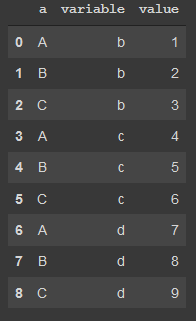

In [291]:
messy.melt(id_vars="a", value_vars=["b","c","d"])

,a,variable,value
0,A,b,1
1,B,b,2
2,C,b,3
3,A,c,4
4,B,c,5
5,C,c,6
6,A,d,7
7,B,d,8
8,C,d,9


In a sentence or two, explain what the tidy data format is.

What are the types of joins?

# Snazzy Graphs

Pick a graph from FiveThirtyEight and try to recreate it. Focus on the following items:
- All text in the orginal graph (except the watermark) is present in your graph and in the same locations
- All text in your graph is roughly the same size and look of the original graph
- Gridlines, Ticklabels, and tickmark spacing matches
- Coloring and/or style matches.